In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
import random

In [2]:
def normalize(dataset):
    
    for col in dataset.columns:
        if col == 'target':
            continue
        dataset[col] = (dataset[col] - dataset[col].min()) / (dataset[col].max() - dataset[col].min())
    
    return dataset

def euclidean_distance(instance_1, instance_2):
    return np.linalg.norm(np.array(instance_1)-np.array(instance_2))

def calculate_metrics(confusion):
    
    confusion = np.array(confusion)
        
    precision = sum([confusion[i][i]/confusion[:,i].sum() if confusion[:,i].sum() != 0 else 1 for i in range(len(confusion[0]))])/len(confusion)
    recall = sum([confusion[i][i]/confusion[i,:].sum() if confusion[i,:].sum() !=0 else 1 for i in range(len(confusion))])/len(confusion)
    accuracy = sum([confusion[i][i] for i in range(len(confusion))])/confusion.sum()

    f1_score = get_f_score(1, precision, recall)

    return accuracy, precision, recall, f1_score

def get_f_score(beta, precision, recall):
    score = ( (1+(beta**2))*(precision*recall) )/( ((beta**2)*precision)+recall )
    return score

In [3]:
class KNN():
    def __init__(self, k, train_dataset):
        self.k = k
        self.dataset = train_dataset
        self.no_classes = len(train_dataset['target'].value_counts())
    
    def test(self, test_dataset):
        confusion = [[0 for i in range(self.no_classes)] for j in range(self.no_classes)]
        correct_predictions = 0
        for instance_1 in test_dataset.itertuples():
            test_distances_list = []
            
            for instance_2 in self.dataset.itertuples():
                distance = euclidean_distance(list(instance_1[1:-1]), list(instance_2[1:-1]))
                test_distances_list.append([distance, instance_2[-1]])
                
            test_distances = pd.DataFrame(test_distances_list,columns=['Distance','target'])
            
            confusion[instance_1[-1]][test_distances.sort_values('Distance')[:self.k]['target'].value_counts().idxmax()] += 1
            if instance_1[-1] == test_distances.sort_values('Distance')[:self.k]['target'].value_counts().idxmax():
                correct_predictions += 1
        return confusion

In [4]:
# Load the dataset
dataset = pd.read_csv('iris.csv', header=None)
dataset = dataset.rename({4:'target'},axis = 1)

dataset['target'].unique()
dataset['target'] = dataset['target'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [5]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=int(random.random()*100))

train_set = normalize(train_set)
test_set = normalize(test_set)

In [6]:
knn = KNN(5, train_set)

In [7]:
confusion = knn.test(test_set)

In [8]:
calculate_metrics(confusion)

(0.9666666666666667,
 0.9696969696969697,
 0.9666666666666667,
 0.9681794470526864)

In [14]:
test_results = {}
train_results = {}

for trial in range(20):
    train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=int(random.random()*100))

    train_set = normalize(train_set)
    test_set = normalize(test_set)
    
    for k in range(1, 52, 2):
        knn = KNN(k, train_set)
        
        train_confusion = knn.test(train_set)
        train_metrics = list(calculate_metrics(train_confusion))
        train_results[k] = [sum(x) for x in zip(train_metrics, train_results.get(k,[0, 0, 0, 0]))]
        
        test_confusion = knn.test(test_set)
        test_metrics = list(calculate_metrics(test_confusion))
        test_results[k] = [sum(x) for x in zip(test_metrics, test_results.get(k,[0, 0, 0, 0]))]

In [15]:
test_accuracy = []
test_f1_score = []

train_accuracy = []
train_f1_score = []

k_values = []

for k in test_results:
    k_values.append(k)

    test_accuracy.append((test_results[k][0])/20)
    test_f1_score.append((test_results[k][3])/20)
    
    train_accuracy.append((train_results[k][0])/20)
    train_f1_score.append((train_results[k][3])/20)

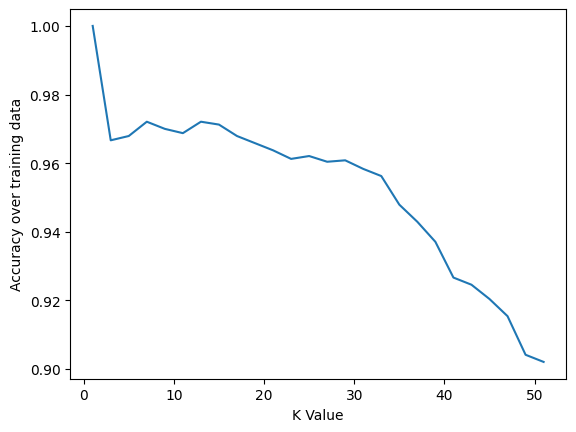

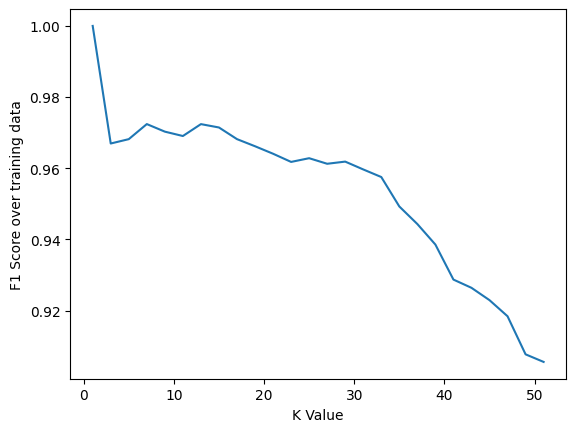

In [16]:
plot.plot(k_values, train_accuracy)
plot.ylabel('Accuracy over training data')
plot.xlabel('K Value')
plot.show()

plot.plot(k_values, train_f1_score)
plot.ylabel('F1 Score over training data')
plot.xlabel('K Value')
plot.show()

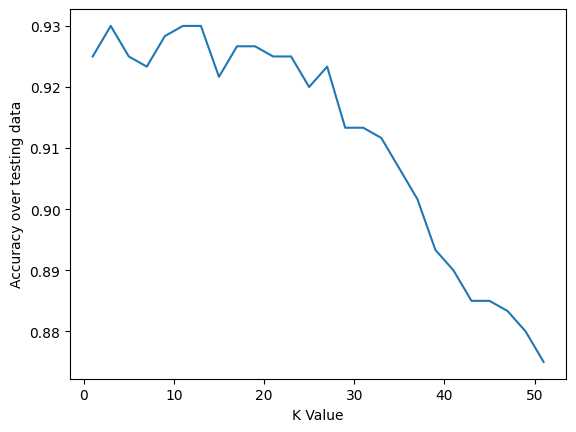

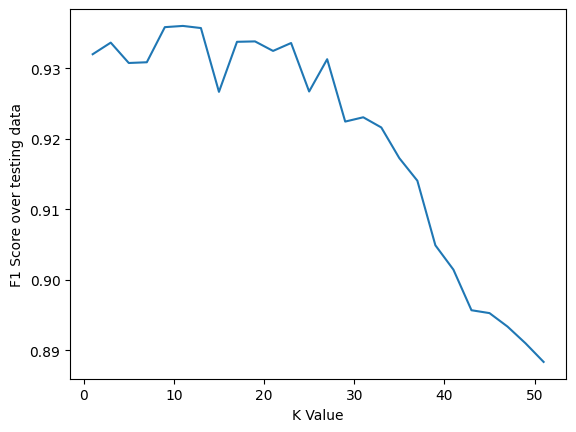

In [17]:
plot.plot(k_values, test_accuracy)
plot.ylabel('Accuracy over testing data')
plot.xlabel('K Value')
plot.show()

plot.plot(k_values, test_f1_score)
plot.ylabel('F1 Score over testing data')
plot.xlabel('K Value')
plot.show()